In [ ]:
import csv
import re # 문자열 처리를 위한 정규표현식 패키지
from copy import copy
import random
import time
import missingno as msno
import numpy as np
import pandas as pd


# 시각화 라이브러리
import matplotlib as mpl        # 시각화 옵션 (글꼴/ 음수값 ...)
import matplotlib.pyplot as plt # 시각화 옵션 (축설정, 범례, 제목, 저장 ...)
import seaborn as sns           # 시각화 할때
import plotly.express as px     # 인터렉티브한 그래프 그릴때
                                 # 데이터 웹 대시보드 제작할 때 사용
import stemgraphic
mpl.rc('font', family = 'malgun.ttf') # 그래프 글꼴 설정(window)

import scipy.stats as stats
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

from sklearn.compose import make_column_transformer

from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

from sklearn.model_selection import train_test_split # 학습데이터와 검증데이터 분할

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

from sklearn.multioutput import MultiOutputRegressor
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier # 의사결정나무모델 알고리즘
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.ensemble import RandomForestClassifier # Bagging Model

from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import silhouette_score

from pathlib import Path
import pathlib
import os

import warnings # 경고 메세지 무시하기
warnings.filterwarnings(action = 'ignore')

In [ ]:
# ztry:
#     os.chdir("C:\IT")
#     print("Directory changed")
# except OSError:
#     print("Can't change the Current Working Directory")  

Directory changed


In [ ]:
# folder = Path('C:\IT')
# file_path_output = folder / "output.txt"
# file_path_output

WindowsPath('C:/IT/output.txt')

In [ ]:
# from IPython.core .interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [ ]:
def read_csv1(file_name):
    f = open(file_name,encoding='utf-8-sig')
    reader = csv.reader(f)
    csv_list=[]
    f.close

    for i in reader:
        csv_list.append(i)
    df = pd.DataFrame(csv_list)
    df = df.rename(columns = df.iloc[0])
    df = df.drop([0])
    return df

In [ ]:
df = pd.read_csv('modeling_df.csv', encoding = 'utf-8-sig')
df = df.drop('Unnamed: 0',axis=1)

In [ ]:
df.columns

Index(['기업명', '대분류코드', 'RND_유무', '기여율(확정)', '총연구비_합계(원)', '특허활용도', '특허영향력',
       '특허경쟁력', 'AI', '특허인용도', '기술투자지수', '시가총액', '매출액', 'EBITDA', 'ROA', 'PBR',
       'PER', '연구자점수'],
      dtype='object')

In [ ]:
df['RND점수'] = df['RND_유무'] * df['기여율(확정)']

In [ ]:
df['RND점수'].value_counts()

100.0     3157
50.0         6
0.0          2
400.0        2
300.0        2
3000.0       1
3300.0       1
900.0        1
750.0        1
1400.0       1
25.0         1
3600.0       1
Name: RND점수, dtype: int64

In [ ]:
df = df.drop(labels=['RND_유무', '기여율(확정)'], axis=1)

In [ ]:
df1 = df[['RND점수', '연구자점수', '총연구비_합계(원)', 
        '특허활용도', '특허영향력', 'AI', '특허인용도',
        '매출액', 'EBITDA', 'ROA', 'PBR', 'PER', '기술투자지수']]

In [ ]:
def func1(row):
    if row >= df1['기술투자지수'].quantile(0.8):
        return '강력매수'
    elif row >= df1['기술투자지수'].quantile(0.6):
        return '매수'
    elif row >= df1['기술투자지수'].quantile(0.4):
        return '보통'
    elif row >= df1['기술투자지수'].quantile(0.2):
        return '매도'
    else:
        return '강력매도'
    
df1['기술투자지수_rank'] = df1['기술투자지수'].apply(func1)
df1['기술투자지수_rank'].value_counts()
df1

,RND점수,연구자점수,총연구비_합계(원),특허활용도,특허영향력,AI,특허인용도,매출액,EBITDA,ROA,PBR,PER,기술투자지수,기술투자지수_rank
0,100.0,6.0,553000000.0,0.001067,0.0,3.375667,0.0,108789.848782,8212.467352,0.000000,0.00,0.000,33.889162,보통
1,100.0,6.0,553000000.0,0.001067,0.0,3.375667,0.0,96172.458812,11748.061722,0.045930,2.01,156.752,33.889162,보통
2,100.0,6.0,553000000.0,0.001067,0.0,3.375667,0.0,169942.042000,50639.134000,0.000000,0.00,0.000,33.889162,보통
3,100.0,6.0,553000000.0,0.001067,0.0,3.375667,0.0,3703.982304,170.183104,0.000000,0.00,0.000,33.889162,보통
4,100.0,6.0,553000000.0,0.001067,0.0,3.375667,0.0,3353.190560,747.423342,0.009846,2.92,17.680,33.889162,보통
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3171,100.0,6.0,553000000.0,0.125000,0.0,395.375000,0.0,925.311758,73.938534,0.000000,0.00,0.000,0.034094,강력매도
3172,100.0,6.0,553000000.0,0.125000,0.0,395.375000,0.0,925.311758,73.938534,0.000000,0.00,0.000,0.034094,강력매도
3173,100.0,6.0,553000000.0,0.125000,0.0,395.375000,0.0,925.311758,73.938534,0.000000,0.00,0.000,0.034094,강력매도
3174,100.0,6.0,553000000.0,0.125000,1.0,395.375000,5.0,925.311758,73.938534,0.000000,0.00,0.000,0.017047,강력매도


In [ ]:
sns.pairplot(df[['RND점수', '연구자점수', '총연구비_합계(원)', 
        '특허활용도', '특허영향력', 'AI', '특허인용도',
        '매출액', 'EBITDA', 'ROA', 'PBR', 'PER', '기술투자지수']])

In [ ]:
sns.pairplot(df[['RND점수', '연구자점수', '총연구비_합계(원)', '기술투자지수']])

In [ ]:
df[['RND점수', '연구자점수', '총연구비_합계(원)', '기술투자지수']].corr()

,RND점수,연구자점수,총연구비_합계(원),기술투자지수
RND점수,1.000000,0.666475,0.564605,-0.034396
연구자점수,0.666475,1.000000,0.957106,-0.031545
총연구비_합계(원),0.564605,0.957106,1.000000,-0.040071
기술투자지수,-0.034396,-0.031545,-0.040071,1.000000


In [ ]:
sns.pairplot(df[['특허활용도', '특허영향력', 'AI', '특허인용도', '기술투자지수']])

In [ ]:
df[['특허활용도', '특허영향력', 'AI', '특허인용도', '기술투자지수']].corr()

,특허활용도,특허영향력,AI,특허인용도,기술투자지수
특허활용도,1.000000,0.318790,0.982858,-0.022615,-0.137418
특허영향력,0.318790,1.000000,0.323979,0.134344,-0.083637
AI,0.982858,0.323979,1.000000,-0.023400,-0.129168
특허인용도,-0.022615,0.134344,-0.023400,1.000000,-0.229970
기술투자지수,-0.137418,-0.083637,-0.129168,-0.229970,1.000000


In [ ]:
# sns.pairplot(df[['매출액', 'EBITDA', 'ROA', 'PBR', 'PER', '기술투자지수']])

In [ ]:
df[['매출액', 'EBITDA', 'ROA', 'PBR', 'PER', '기술투자지수']].corr()

,매출액,EBITDA,ROA,PBR,PER,기술투자지수
매출액,1.000000,0.985164,0.127241,0.124734,0.021465,-0.021610
EBITDA,0.985164,1.000000,0.129181,0.125497,0.018506,-0.015079
ROA,0.127241,0.129181,1.000000,0.272842,0.037723,-0.009835
PBR,0.124734,0.125497,0.272842,1.000000,0.493451,-0.058459
PER,0.021465,0.018506,0.037723,0.493451,1.000000,-0.026579
기술투자지수,-0.021610,-0.015079,-0.009835,-0.058459,-0.026579,1.000000


In [ ]:
df1.corr()

,RND점수,연구자점수,총연구비_합계(원),특허활용도,특허영향력,AI,특허인용도,매출액,EBITDA,ROA,PBR,PER,기술투자지수,연구자점수_rank,RND점수_rank,특허활용도_rank,특허인용도_rank,기술투자지수_rank,AI_rank
RND점수,1.000000,0.666475,0.564605,-0.017299,-0.003765,-0.000945,-0.012407,0.086833,0.016314,-0.001891,-0.005179,-0.001492,-0.034396,0.666475,1.000000,-0.017299,-0.012407,-0.034396,-0.000945
연구자점수,0.666475,1.000000,0.957106,-0.020721,-0.003453,-0.009623,-0.011379,0.140371,0.041209,-0.001131,0.015672,0.001685,-0.031545,1.000000,0.666475,-0.020721,-0.011379,-0.031545,-0.009623
총연구비_합계(원),0.564605,0.957106,1.000000,-0.014254,-0.004386,-0.000099,-0.014454,0.139506,0.043922,0.008014,0.008249,0.001201,-0.040071,0.957106,0.564605,-0.014254,-0.014454,-0.040071,-0.000099
특허활용도,-0.017299,-0.020721,-0.014254,1.000000,0.318790,0.982858,-0.022615,-0.003311,-0.002259,0.017526,0.114399,0.077289,-0.137418,-0.020721,-0.017299,1.000000,-0.022615,-0.137418,0.982858
특허영향력,-0.003765,-0.003453,-0.004386,0.318790,1.000000,0.323979,0.134344,-0.002917,-0.002185,-0.001422,-0.007128,-0.003093,-0.083637,-0.003453,-0.003765,0.318790,0.134344,-0.083637,0.323979
AI,-0.000945,-0.009623,-0.000099,0.982858,0.323979,1.000000,-0.023400,-0.000584,-0.002060,-0.001294,0.007151,0.004910,-0.129168,-0.009623,-0.000945,0.982858,-0.023400,-0.129168,1.000000
특허인용도,-0.012407,-0.011379,-0.014454,-0.022615,0.134344,-0.023400,1.000000,-0.009618,-0.007201,-0.004685,-0.023489,-0.010193,-0.229970,-0.011379,-0.012407,-0.022615,1.000000,-0.229970,-0.023400
매출액,0.086833,0.140371,0.139506,-0.003311,-0.002917,-0.000584,-0.009618,1.000000,0.985164,0.127241,0.124734,0.021465,-0.021610,0.140371,0.086833,-0.003311,-0.009618,-0.021610,-0.000584
EBITDA,0.016314,0.041209,0.043922,-0.002259,-0.002185,-0.002060,-0.007201,0.985164,1.000000,0.129181,0.125497,0.018506,-0.015079,0.041209,0.016314,-0.002259,-0.007201,-0.015079,-0.002060
ROA,-0.001891,-0.001131,0.008014,0.017526,-0.001422,-0.001294,-0.004685,0.127241,0.129181,1.000000,0.272842,0.037723,-0.009835,-0.001131,-0.001891,0.017526,-0.004685,-0.009835,-0.001294


In [ ]:
df1.corr()['기술투자지수'].sort_values(ascending = False) # 최대 0.177058, 최소 0.000852

기술투자지수_rank    1.000000
기술투자지수         1.000000
ROA           -0.009835
EBITDA        -0.015079
매출액           -0.021610
PER           -0.026579
연구자점수_rank    -0.031545
연구자점수         -0.031545
RND점수_rank    -0.034396
RND점수         -0.034396
총연구비_합계(원)    -0.040071
PBR           -0.058459
특허영향력         -0.083637
AI_rank       -0.129168
AI            -0.129168
특허활용도_rank    -0.137418
특허활용도         -0.137418
특허인용도         -0.229970
특허인용도_rank    -0.229970
Name: 기술투자지수, dtype: float64

In [ ]:
mpl.rc('font', family = 'malgun.ttf')

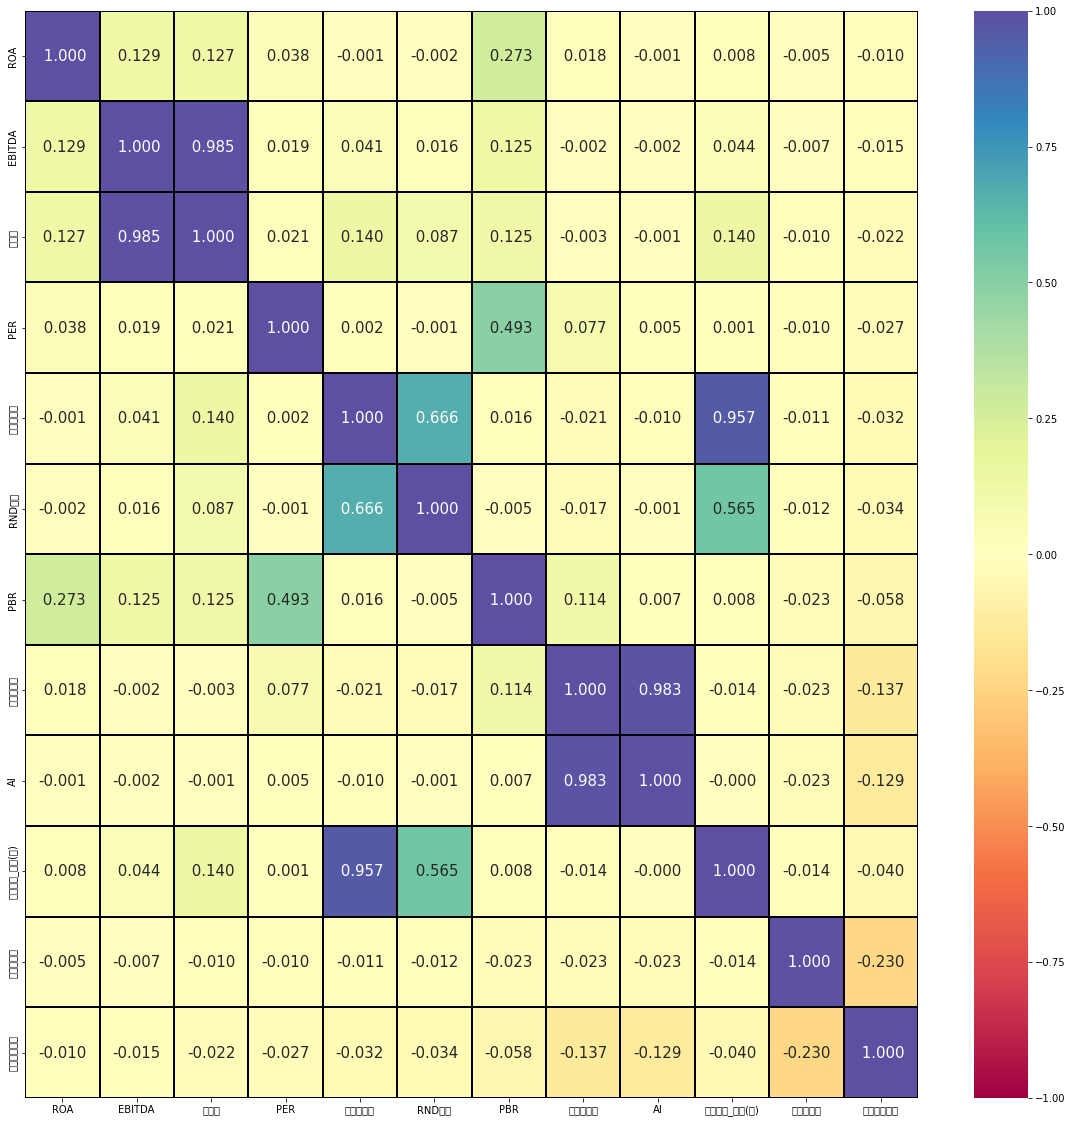

In [ ]:
plt.figure(figsize = (20, 20))
sns.heatmap(df1[['ROA','EBITDA','매출액','PER','연구자점수','RND점수','PBR','특허활용도','AI','총연구비_합계(원)','특허인용도','기술투자지수']].corr(), annot = True, annot_kws = {'size' : 15},
            fmt = ' .3f', vmin=-1, vmax=1, center= 0, cmap= 'Spectral', linewidths=1, linecolor='black')

## [P.1] Bagging 모델

먼저, 결정 트리 기반의 bagging 알고리즘을 구현할 것임

In [ ]:
df1 = df[['RND점수', '연구자점수', '총연구비_합계(원)', 
        '특허활용도', '특허영향력', 'AI', '특허인용도',
        '매출액', 'EBITDA', 'ROA', 'PBR', 'PER','기술투자지수']]

In [ ]:
def func1(row):
    if row >= df1['기술투자지수'].quantile(0.8):
        return '강력매수'
    elif row >= df1['기술투자지수'].quantile(0.6):
        return '매수'
    elif row >= df1['기술투자지수'].quantile(0.4):
        return '보통'
    elif row >= df1['기술투자지수'].quantile(0.2):
        return '매도'
    else:
        return '강력매도'
    
df1['기술투자지수_rank'] = df1['기술투자지수'].apply(func1)
df1['기술투자지수_rank'].value_counts()
df1

매수      851
강력매수    805
강력매도    596
매도      484
보통      440
Name: 기술투자지수_rank, dtype: int64

,RND점수,연구자점수,총연구비_합계(원),특허활용도,특허영향력,AI,특허인용도,매출액,EBITDA,ROA,PBR,PER,기술투자지수,기술투자지수_rank
0,100.0,6.0,553000000.0,0.001067,0.0,3.375667,0.0,108789.848782,8212.467352,0.000000,0.00,0.000,33,보통
1,100.0,6.0,553000000.0,0.001067,0.0,3.375667,0.0,96172.458812,11748.061722,0.045930,2.01,156.752,33,보통
2,100.0,6.0,553000000.0,0.001067,0.0,3.375667,0.0,169942.042000,50639.134000,0.000000,0.00,0.000,33,보통
3,100.0,6.0,553000000.0,0.001067,0.0,3.375667,0.0,3703.982304,170.183104,0.000000,0.00,0.000,33,보통
4,100.0,6.0,553000000.0,0.001067,0.0,3.375667,0.0,3353.190560,747.423342,0.009846,2.92,17.680,33,보통
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3171,100.0,6.0,553000000.0,0.125000,0.0,395.375000,0.0,925.311758,73.938534,0.000000,0.00,0.000,0,강력매도
3172,100.0,6.0,553000000.0,0.125000,0.0,395.375000,0.0,925.311758,73.938534,0.000000,0.00,0.000,0,강력매도
3173,100.0,6.0,553000000.0,0.125000,0.0,395.375000,0.0,925.311758,73.938534,0.000000,0.00,0.000,0,강력매도
3174,100.0,6.0,553000000.0,0.125000,1.0,395.375000,5.0,925.311758,73.938534,0.000000,0.00,0.000,0,강력매도


In [ ]:
df1 = df.copy()

In [ ]:
df1['연구자점수_rank'] = (df1['연구자점수']/max(df1['연구자점수']))*10

In [ ]:
df1['연구자점수_rank'].value_counts()

In [ ]:
df1['RND점수_rank'] = (df1['RND점수']/max(df1['RND점수']))*10

In [ ]:
df1['RND점수_rank'].value_counts()

In [ ]:
df1['특허활용도_rank'] = (df1['특허활용도']/max(df1['특허활용도']))*10

In [ ]:
df1['특허활용도_rank'].value_counts()

In [ ]:
df1['특허인용도_rank'] = (df1['특허인용도']/max(df1['특허인용도']))*10

In [ ]:
df1['특허인용도_rank'].value_counts()

In [ ]:
df1['기술투자지수_rank'] = (df1['기술투자지수']/max(df1['기술투자지수']))*10

In [ ]:
df1['기술투자지수'].astype

In [ ]:
df1['기술투자지수_rank'].value_counts()

In [ ]:
df1['AI_rank'] = (df1['AI']/max(df1['AI']))*10

In [ ]:
df1['AI_rank'].value_counts()

In [ ]:
df1.columns

In [ ]:
a = df1[df1['대분류코드'] == 'J']

In [ ]:
df1.to_csv('modeling_df.csv',encoding='utf-8-sig', index=False)

In [ ]:
X = a[['ROA','EBITDA','매출액','PER','연구자점수','RND점수','PBR','총연구비_합계(원)']]
#재무제표, 총연구비를 제외하고 나머지 1~10 사이 숫자로 바꿔주기.max로 나누고 *10
#산업, 기업규모 에 따라서 1위부터 10위까지 뽑아보기
#모델링 어떻게 할지 생각해보기.
#df = df.astype({'기술투자지수': 'int'})
y = a['기술투자지수'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = None)

In [ ]:
df1['Target'] = np.nan

In [ ]:
for i in range(len(df1['기술투자지수'])):
  if df1['기술투자지수'][i] >= df1['기술투자지수'].quantile(0.7):
    df1['Target'][i] = 3
  elif df1['기술투자지수'].quantile(0.7) > df1['기술투자지수'][i] >= df1['기술투자지수'].quantile(0.5):
    df1['Target'][i] = 2
  elif df1['기술투자지수'].quantile(0.5) > df1['기술투자지수'][i]:
    df1['Target'][i] = 1

df1['Target']

In [ ]:
df1['Target'].value_counts()

1    1549
3    1018
2     609
Name: Target, dtype: int64

In [ ]:
df1['기술투자지수'].quantile(0.5)

68.86932341219857

In [ ]:
svc = SVC(gamma="scale")
model = MultiOutputClassifier(estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                    class_weight=None, coef0=0.0,
                                    decision_function_shape='ovr', degree=3,
                                    gamma='scale', kernel='rbf', max_iter=-1,
                                    probability=False, random_state=None,
                                    shrinking=True, tol=0.001, verbose=False),
                      n_jobs=None) 

In [ ]:
model.fit(X_train, y_train.values.reshape(-1,1))
print(model.score(X_train, y_train.values.reshape(-1,1)))

0.6770508826583593


In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6307053941908713

In [ ]:
y_test.value_counts()

342    152
171     30
114     19
85      11
68       6
48       5
38       4
57       3
42       2
34       2
16       2
18       1
15       1
9        1
31       1
13       1
Name: 기술투자지수, dtype: int64

In [ ]:
y_pred

array([[342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
       [342],
      

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [ ]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, max_samples=0.2, bootstrap=True)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
y_pred

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.3081761006289308

In [ ]:
y_pred

In [ ]:
y_test

2571    342
1608     20
1322     68
44        0
1148     68
       ... 
214      33
165      16
3162      0
2040     68
2748     85
Name: 기술투자지수, Length: 636, dtype: int64

In [ ]:
df1.iloc[2571]

기업명            에스에이엠지엔터테인먼트
대분류코드                     J
RND_유무                  1.0
기여율(확정)               100.0
총연구비_합계(원)      553000000.0
특허활용도              0.000039
특허영향력                   0.0
특허경쟁력                0.0001
AI                 2.603292
특허인용도                   0.0
기술투자지수           342.028244
시가총액            1216.968895
매출액              925.311758
EBITDA            73.938534
ROA                     0.0
PBR                     0.0
PER                     0.0
연구자점수                   6.0
RND점수                 100.0
연구자점수_rank         0.398671
RND점수_rank         0.277778
특허활용도_rank         0.000387
특허인용도_rank              0.0
기술투자지수_rank        4.087296
AI_rank             0.00823
Target                    3
Name: 2571, dtype: object

In [ ]:
tree_clf = DecisionTreeClassifier()

tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.4858490566037736

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.49      1.00      0.65       309
           2       0.00      0.00      0.00       116
           3       0.00      0.00      0.00       211

    accuracy                           0.49       636
   macro avg       0.16      0.33      0.22       636
weighted avg       0.24      0.49      0.32       636



## [P.2] Random Forest 모델

트리 모델 간의 상관 관계를 줄여 앙상블 효과를 극대화하는 Random Forest 모델을 구현하고 성능을 평가해볼 것임     
사이킷런에서 제공하는 [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) 클래스를 사용하면 됨

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16)
rnd_clf.fit(X_train, y_train)

y_pred = rnd_clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.4858490566037736

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.49      1.00      0.65       309
           2       0.00      0.00      0.00       116
           3       0.00      0.00      0.00       211

    accuracy                           0.49       636
   macro avg       0.16      0.33      0.22       636
weighted avg       0.24      0.49      0.32       636



In [ ]:
rnd_clf.feature_importances_

array([0.00501463, 0.0053704 , 0.07308459, 0.32401651, 0.24200875,
       0.23046344, 0.0196865 , 0.02034771, 0.02568344, 0.05432403])

## [P.3] AdaBoost 모델

이번에는 Boosting 알고리즘인 `AdaBoost`를 활용해 모델을 구현해볼 것임     
사이킷런에서 제공하는 [`AdaBoostClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) 클래스를 사용하면 쉽게 구현 가능함     

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=100, learning_rate=0.5)

ada_clf.fit(X_train, y_train)

y_pred = ada_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.4858490566037736

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.49      1.00      0.65       309
           2       0.00      0.00      0.00       116
           3       0.00      0.00      0.00       211

    accuracy                           0.49       636
   macro avg       0.16      0.33      0.22       636
weighted avg       0.24      0.49      0.32       636



In [ ]:
X = df1[['총연구비_합계(원)', 
        '매출액', 'EBITDA', 'ROA', 'PBR', 'PER', 'Target']]
num_cluster = [3, 4, 5]

for i in num_cluster:
    cluster = KMeans(n_clusters = i)
    cluster.fit(X)
    X_cluster = cluster.fit_predict(X)
    print(i, '개의 군집 silhouette : ', silhouette_score(X, X_cluster))

3 개의 군집 silhouette :  0.996077785357197
4 개의 군집 silhouette :  0.9944621001234508
5 개의 군집 silhouette :  0.99129828286043


In [ ]:
X = df1[['RND점수', '연구자점수', '총연구비_합계(원)', 
        '특허활용도', '특허영향력', 'AI', '특허인용도',
        '매출액', 'EBITDA', 'ROA', 'PBR', 'PER', '기술투자지수']]
X

,RND점수,연구자점수,총연구비_합계(원),특허활용도,특허영향력,AI,특허인용도,매출액,EBITDA,ROA,PBR,PER,기술투자지수
0,100.0,6.0,553000000.0,0.001067,0.0,3.375667,0.0,108789.848782,8212.467352,0.000000,0.00,0.000,33.889162
1,100.0,6.0,553000000.0,0.001067,0.0,3.375667,0.0,96172.458812,11748.061722,0.045930,2.01,156.752,33.889162
2,100.0,6.0,553000000.0,0.001067,0.0,3.375667,0.0,169942.042000,50639.134000,0.000000,0.00,0.000,33.889162
3,100.0,6.0,553000000.0,0.001067,0.0,3.375667,0.0,3703.982304,170.183104,0.000000,0.00,0.000,33.889162
4,100.0,6.0,553000000.0,0.001067,0.0,3.375667,0.0,3353.190560,747.423342,0.009846,2.92,17.680,33.889162
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3171,100.0,6.0,553000000.0,0.125000,0.0,395.375000,0.0,925.311758,73.938534,0.000000,0.00,0.000,0.034094
3172,100.0,6.0,553000000.0,0.125000,0.0,395.375000,0.0,925.311758,73.938534,0.000000,0.00,0.000,0.034094
3173,100.0,6.0,553000000.0,0.125000,0.0,395.375000,0.0,925.311758,73.938534,0.000000,0.00,0.000,0.034094
3174,100.0,6.0,553000000.0,0.125000,1.0,395.375000,5.0,925.311758,73.938534,0.000000,0.00,0.000,0.017047


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
cluster = AgglomerativeClustering()
cluster.fit(X_train)

AgglomerativeClustering()

In [ ]:
X['Cluster'] = cluster.fit_predict(X)

In [ ]:
accuracy_score(y_test, y_pred)

0.29245283018867924

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.44      0.60        34
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         8
          11       0.00      0.00      0.00        13
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00        11
          16       0.00      0.00      0.00         8
          17       0.00      0.00      0.00        11
          18       0.00      0.00      0.00         1
          20       0.00    

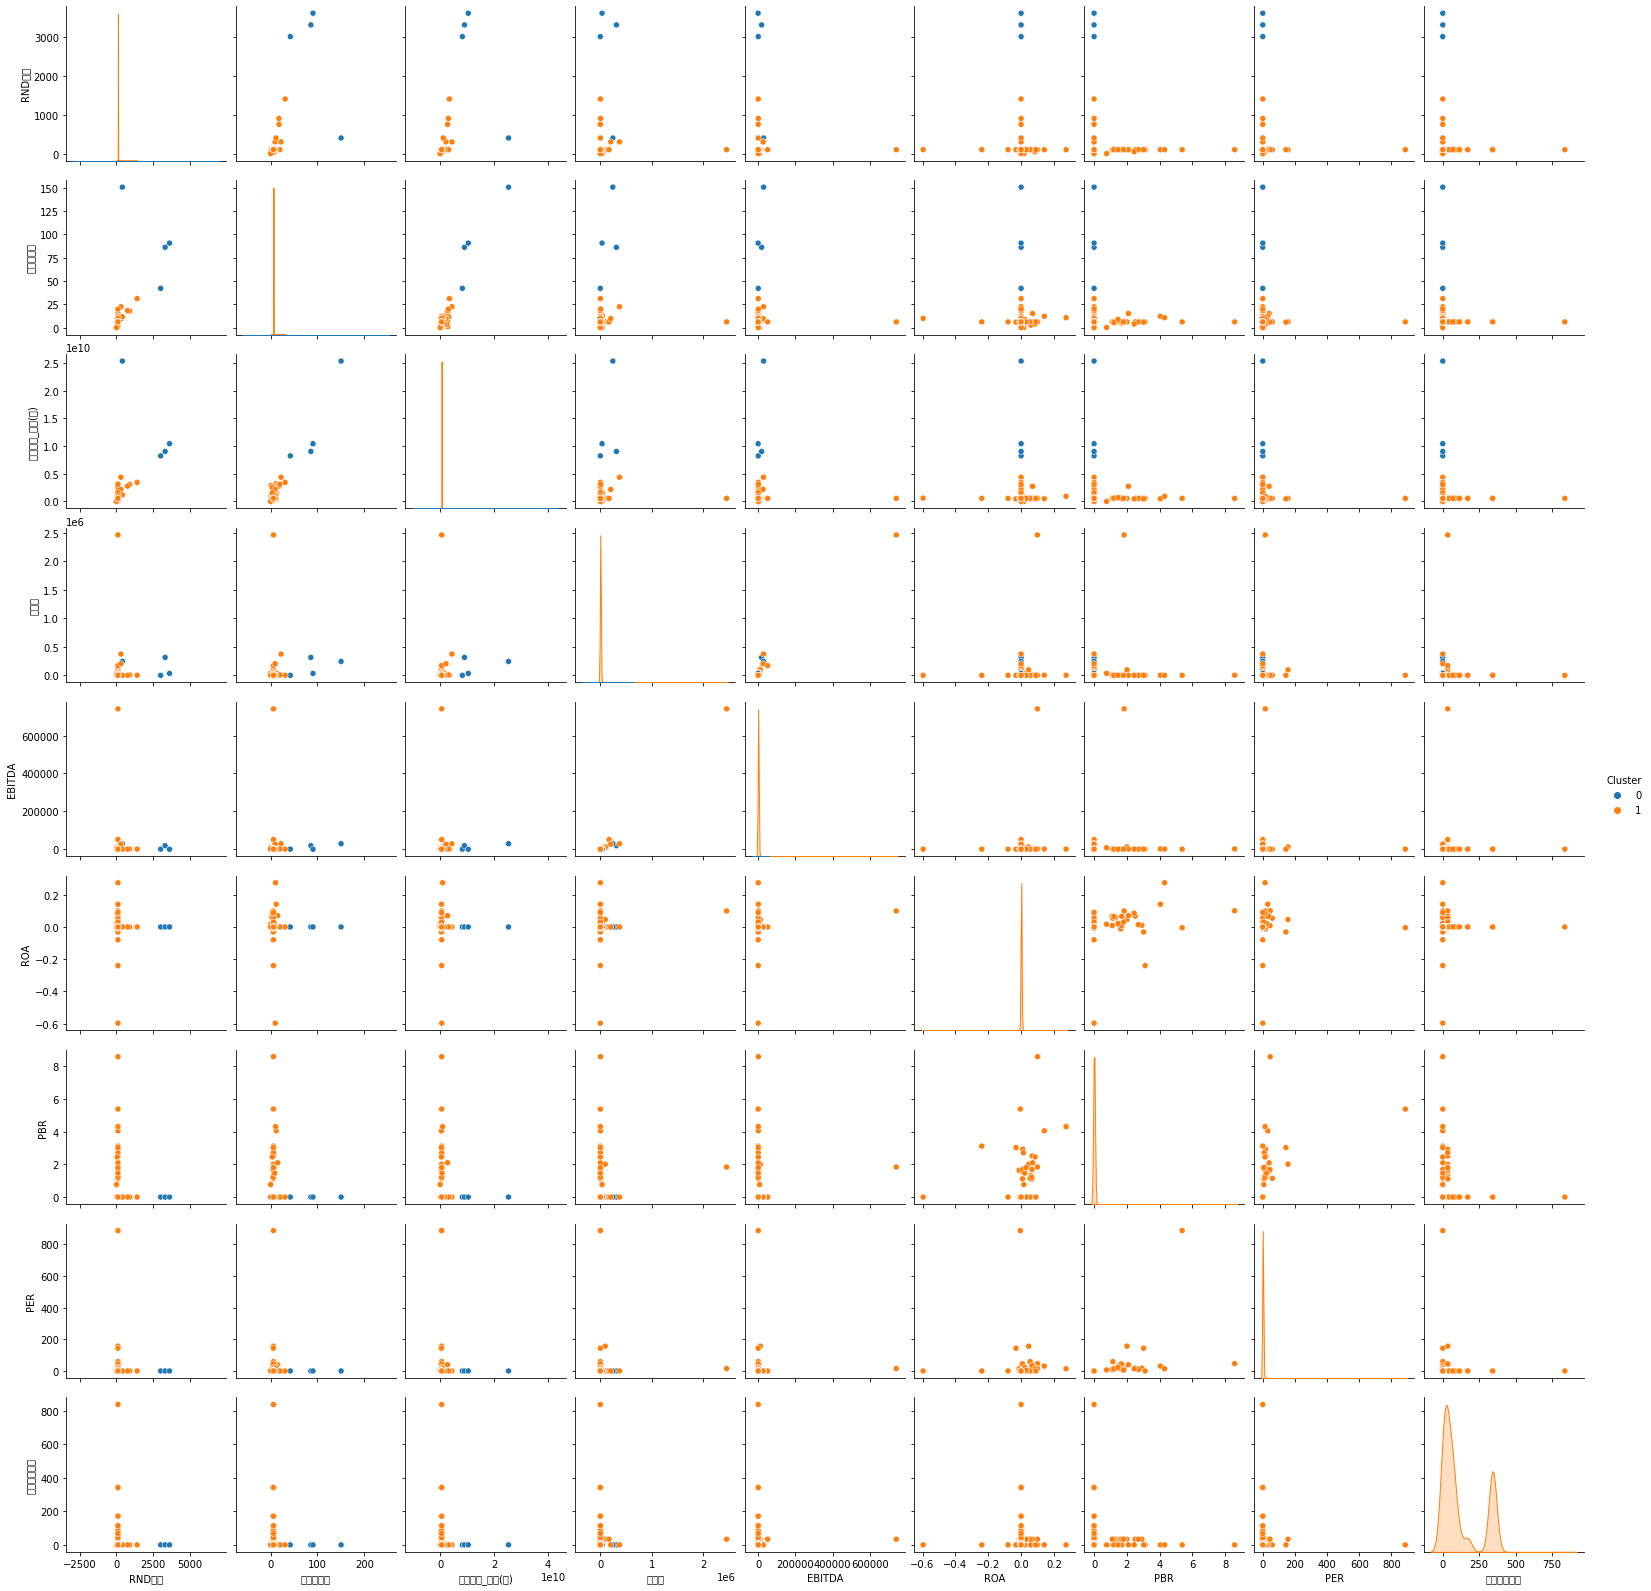

In [ ]:
sns.pairplot(data=X, hue='Cluster')

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
cluster = KMeans(n_clusters=5)
cluster.fit(X)

KMeans(n_clusters=5)

In [ ]:
X['kmeans_cluster'] = cluster.fit_predict(X)
X['kmeans_cluster'].value_counts()

0    3155
3      10
4       7
1       3
2       1
Name: kmeans_cluster, dtype: int64

In [ ]:
silhouette_score(X, X['kmeans_cluster'])

0.9912981493528282

In [ ]:
for i in [2,3,4,5]:
    cluster = KMeans(n_clusters= i)
    cluster.fit(X)
    X_cluster = cluster.fit_predict(X)
    print(i,'개 의 군집 실루엣 :', silhouette_score(X,X_cluster))

2 개 의 군집 실루엣 : 0.9968606930037109
3 개 의 군집 실루엣 : 0.9960777703197282
4 개 의 군집 실루엣 : 0.9944620443324224
5 개 의 군집 실루엣 : 0.9912981493528282


In [ ]:
X = df[['RND점수', '연구자점수', '총연구비_합계(원)', 
        '특허활용도', '특허영향력', 'AI', '특허인용도',
        '매출액', 'EBITDA', 'ROA', 'PBR', 'PER']]

In [ ]:
Y_1 = df['기술투자지수']

In [ ]:
y = []

for i in Y_1:
    if i < Y_1.quantile(q=0.2):
        y.append(1)
    elif Y_1.quantile(q=0.2)<= i<Y_1.quantile(q=0.4):
        y.append(2)
    elif Y_1.quantile(q=0.4)<=i<Y_1.quantile(q=0.6):
        y.append(3)
    elif Y_1.quantile(q=0.6)<=i<Y_1.quantile(q=0.8):
        y.append(4)
    else:
        y.append(5)

In [ ]:
y

In [ ]:
Y = pd.DataFrame(y)
Y

,0
0,3
1,3
2,3
3,3
4,3
...,...
3171,1
3172,1
3173,1
3174,1


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1234)

In [ ]:
forest = RandomForestClassifier(random_state=1)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=2)
result = multi_target_forest.fit(X, Y).predict(X)

In [ ]:
Y_test_pred = multi_target_forest.fit(X_train, Y_train).predict(X_test)
Y_train_pred = multi_target_forest.fit(X_train, Y_train).predict(X_train)

In [ ]:
Y_test_pred = multi_target_forest.fit(X_train, Y_train).predict(X_test)
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       193
           2       1.00      1.00      1.00       134
           3       0.99      0.99      0.99       135
           4       1.00      1.00      1.00       241
           5       1.00      1.00      1.00       250

    accuracy                           1.00       953
   macro avg       1.00      1.00      1.00       953
weighted avg       1.00      1.00      1.00       953



In [ ]:
df1 = pd.read_csv('C:\Dropbox\Data\\01_Data.csv')
df1['Target'] = df1['State'].replace({'계약확정' : 0, '기간만료' : 0, '해약확정' : 1, '해약진행중' : 1})

X = df1[['Term', 'Product_Type', 'Amount_Month', 'Age', 'Gender', 'Credit_Rank']]
Y = df1['Target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 1234)

numeric_pipe = make_pipeline(SimpleImputer(), MinMaxScaler())
category_pipe = make_pipeline(SimpleImputer(strategy = 'most_frequent'), OneHotEncoder())

numeric_list = X.describe().columns.tolist()
category_list = X.describe(include = 'object').columns.tolist()

preprocess_pipe = make_column_transformer((numeric_pipe, numeric_list),
                                          (category_pipe, category_list))

model_pipe = make_pipeline(preprocess_pipe, SMOTE(), RandomForestClassifier())

hyperparameter_list = {'randomforestclassifier__max_depth':range(5,11)
                        , 'randomforestclassifier__min_samples_split':range(5,11)}

grid_model = GridSearchCV(model_pipe, error_score = 'raise', param_grid = hyperparameter_list, cv = 5, n_jobs = -1, scoring = 'f1')

grid_model.fit(X_train, Y_train)

best_model = grid_model.best_estimator_
Y_train_pred = best_model.predict(X_train)
Y_test_pred = best_model.predict(X_test)

print(classification_report(Y_train, Y_train_pred))
print(classification_report(Y_test, Y_test_pred))

pickle.dump(best_model, open('model_web.sav', 'wb'))best_model.predict_proba(X_train) 
# [해약 확률, 해약하지 않을 확률]
#  -> 더 큰 확률값으로 best_model.predict 에서1/0 구분이 되는 것이다.